# Describing and Visualizing the Data

We have seen how to access the data and perform some basic manipulations. In practice, datasets are often large enough to make it difficult to grasp their structure or patterns by simply printing rows or scanning tables. This is where **descriptive statistics** and **visualization techniques** become essential tools.

Describing and visualizing the data helps us:

- Gather insights on the dataset
- Understand the main characteristics of each variable
- Detect missing or anomalous values
- Identify relationships between variables
- Spot trends or clusters of data which are similar
- Guide the choice of pre-processing and further modeling

To make some example, we will consider a simple dataset where weights (in pounds), heights (in inches), and sex of various subjects. The dataset will look like this:

In [ ]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight_pounds.csv')
hw.info()
hw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   object 
 1   height  4231 non-null   int64  
 2   weight  4231 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 99.3+ KB


,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390


Since we are inspecting the dataset, it is worth to answer these questions:

- How many observations do we have?
- How many variables?
- What are the measuring scales of each variable?
- Which variables are discrete? Which continuous? Which numerical?
- Are there missing values?

We will begin by focusing on the univariate sample of heights:

In [ ]:
heights = hw['height']
heights

0       74
1       70
2       61
3       68
4       66
        ..
4226    69
4227    69
4228    64
4229    64
4230    61
Name: height, Length: 4231, dtype: int64

## Absolute and Relative Frequencies

### Absolute Frequencies
A first way to describe data is to calculate the number of times each value appears. These are called "absolute frequencies". Absolute frequencies are generally calculated for discrete variables where observations take a finite number of values.

Let

$$a_1, a_2, \ldots, a_n$$

be the values that the variable under consideration can take.

The absolute frequencies $n_i$ are defined as the number of times that $a_i$ appears in the sample. Note that:

$$\sum_i n_i = n$$

Where $n$ is the total number of elements in the sample.

We can compute unique values $a_j$ as follows:

In [ ]:
heights.unique()

array([74, 70, 61, 68, 66, 65, 64, 67, 72, 71, 76, 69, 63, 75, 60, 59, 73])

The absolute frequencies can be computed as follows:

In [ ]:
heights.value_counts()

height
64    435
61    411
66    391
67    377
68    355
65    351
69    302
63    291
70    272
72    260
71    235
73    146
60    130
74    104
75     72
59     52
76     47
Name: count, dtype: int64

Note that this will sort the values by frequency. We can sort them by value as follows:

In [ ]:
heights.value_counts().sort_index()

height
59     52
60    130
61    411
63    291
64    435
65    351
66    391
67    377
68    355
69    302
70    272
71    235
72    260
73    146
74    104
75     72
76     47
Name: count, dtype: int64

#### Bar Chart of Absolute Frequencies
The data frequencies can be graphically represented using a bar chart that places the unique value ($a_i$) on the x-axis and represents the absolute frequency $n_i$ as the height of the bar.

In our example:

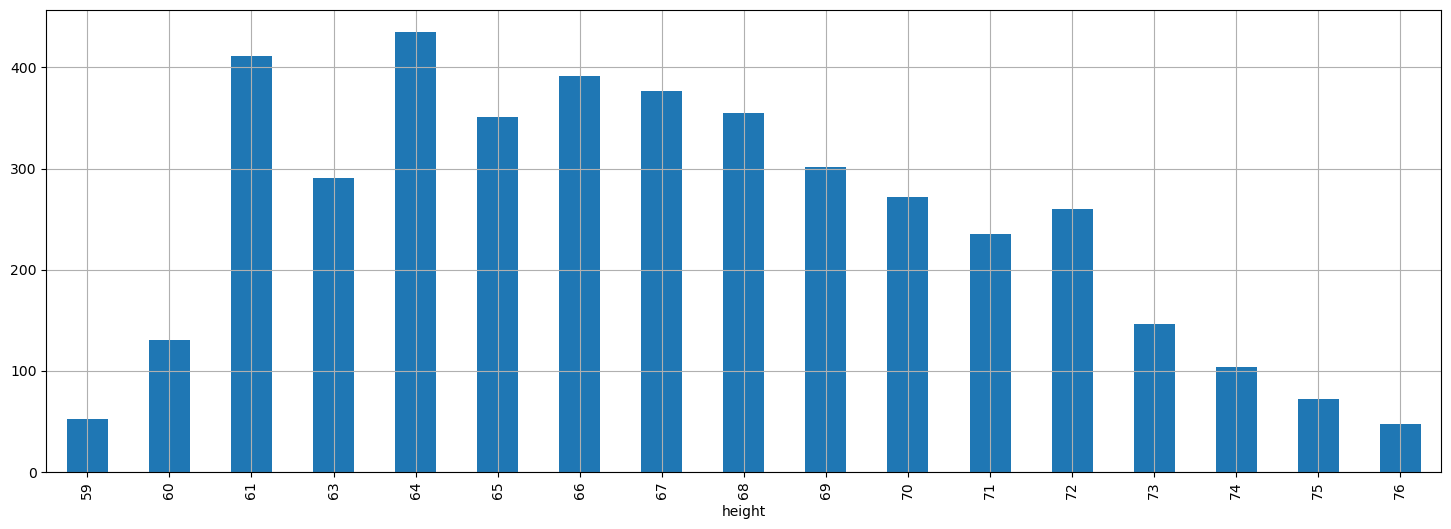

In [ ]:
from matplotlib import pyplot as plt
hw['height'].value_counts().sort_index().plot.bar(figsize=(18,6))
plt.grid()
plt.show()

The graph above tells us something about the number of occurrences of a given value and also gives us an idea of which values are more or less frequent. We see that the data follows a "bell" shape. We will often find this type of shape and will discuss it further later.

### Relative Frequencies
Absolute frequencies allow us to get a more precise idea of how data are distributed, regardless of the size of our sample. For example, we know that the sample contains more individuals with a height of $167.64\ cm$ than individuals with a height of $193.04\ cm$. However, this representation is linked to the total number of elements contained in the sample. For example, a similarly distributed sample, but with more observations, will result in larger absolute frequencies. We can obtain a representation independent of the sample size by analyzing relative frequencies, defined as follows:

$$f_j = f(a_j) = \frac{n_j}{n}, j=1,2,\ldots,k$$

Note that, given the definition, we will have:

$$ n_j \leq n \Rightarrow f_j \leq 1\ \forall j $$

$$ \sum_j f_j = \sum_j \frac{n_j}{n} = \frac{1}{n}\sum_j n_j = \frac{n}{n} = 1$$

We can obtain relative frequencies still with value_counts, but this time we will pass the argument `normalize=True`:

In [ ]:
heights.value_counts(normalize=True).sort_index()

height
59    0.012290
60    0.030726
61    0.097140
63    0.068778
64    0.102813
65    0.082959
66    0.092413
67    0.089104
68    0.083905
69    0.071378
70    0.064287
71    0.055542
72    0.061451
73    0.034507
74    0.024580
75    0.017017
76    0.011108
Name: proportion, dtype: float64

#### Bar Chart of Relative Frequencies

By plotting the relative frequencies using a bar chart, we obtain a graph very similar to the one showing absolute frequencies, but with a different scale on the y-axis.

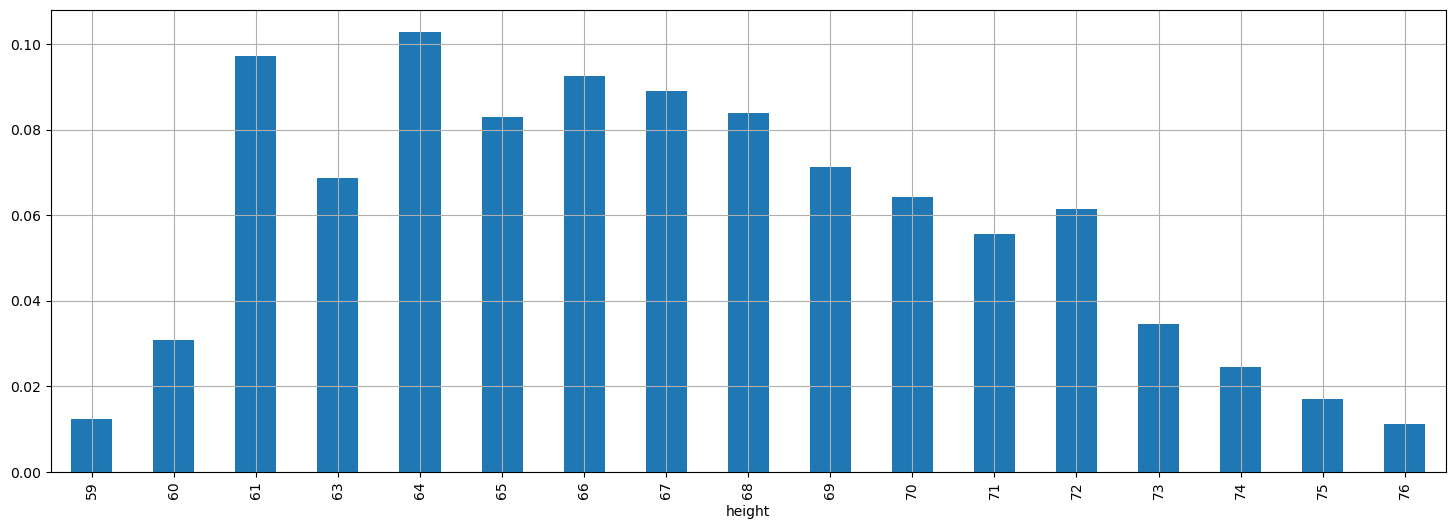

In [ ]:
(hw['height'].value_counts(normalize=True).sort_index()).plot.bar(figsize=(18,6))
plt.grid()
plt.show()

Relative frequency bar charts are useful for comparing different samples. For example, we can consider the heights of men and women in the weights-and-heights dataset:

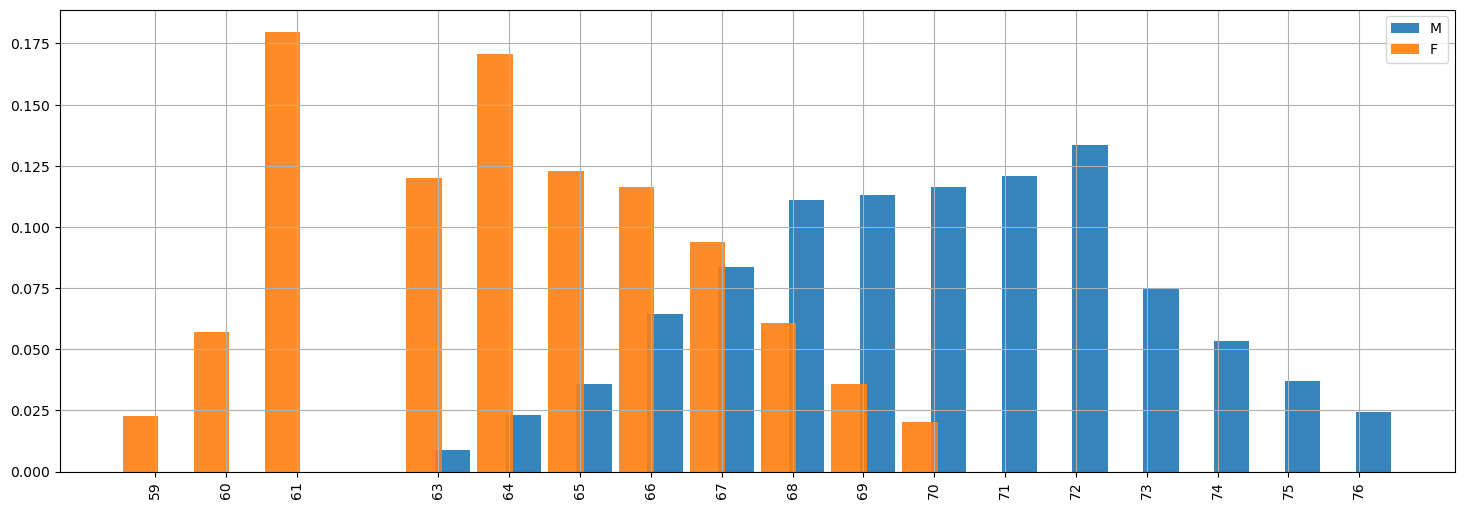

In [ ]:
pmf_height_m = hw[hw['sex']=='M']['height'].value_counts(normalize=True).sort_index()
pmf_height_f = hw[hw['sex']=='F']['height'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(18,6))
# We add and subtract 0.2 from the indices to "shift" the bars and make them
# visible when overlapping. We also set alpha=0.9 to make the bars
# partially transparent.
plt.bar(pmf_height_m.index+0.2, pmf_height_m.values, width=0.5, alpha=0.9)
plt.bar(pmf_height_f.index-0.2, pmf_height_f.values, width=0.5, alpha=0.9)
plt.xticks(hw['height'].unique(), rotation='vertical')
plt.legend(['M','F']) # Display a legend
plt.grid()
plt.show()

From the comparison above, we can already make some qualitative observations about the two samples. In particular, we notice (unsurprisingly) that men are generally taller than women. This doesn’t mean that there aren’t men who are shorter than some women, or vice versa, but such cases are reasonably less frequent.

#### Barplots and Stacked Barplots

We can also used barplots and stacked barplots to count the number of elements in a given class. For instance, a barplot counting the number of subjects in the "male" or "female" class looks like this:

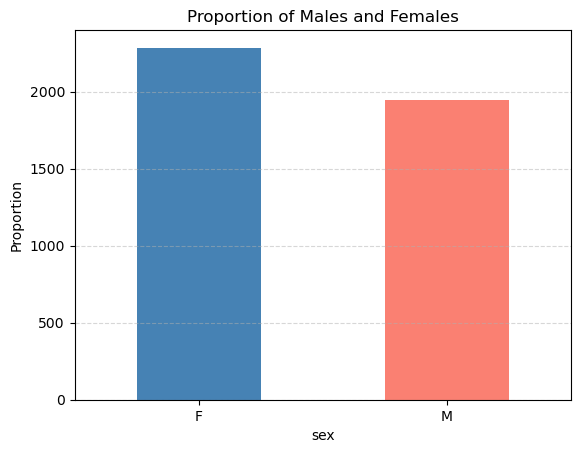

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
sex_counts = hw['sex'].value_counts()

# Create bar plot
sex_counts.plot.bar(color=['steelblue', 'salmon'])

# Customize plot
plt.title('Proportion of Males and Females')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

We can obtain the normalized version by passing normalize=True to value_counts:

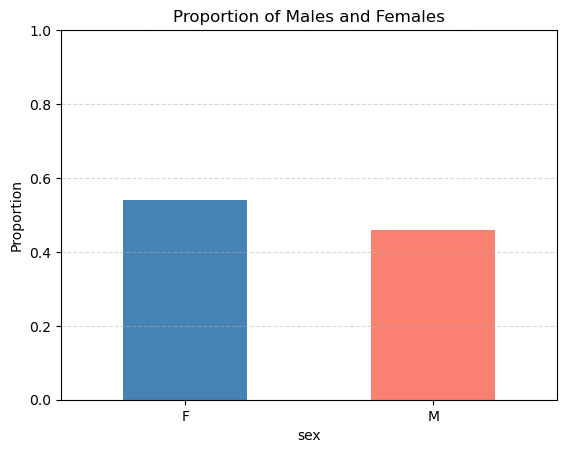

In [ ]:
import matplotlib.pyplot as plt

# Calculate proportions
sex_counts = hw['sex'].value_counts(normalize=True)

# Create bar plot
sex_counts.plot.bar(color=['steelblue', 'salmon'])

# Customize plot
plt.title('Proportion of Males and Females')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

When numbers sum to one, another popular visualization is that of the stacked plot:

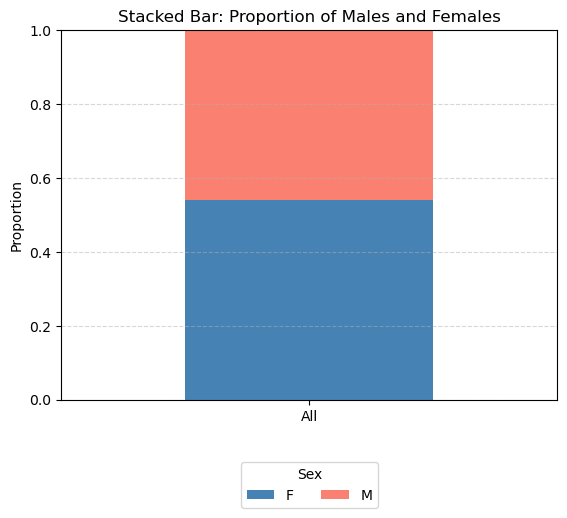

In [ ]:
import matplotlib.pyplot as plt

# Compute proportions grouped by a single dummy category
sex_props = hw.groupby(lambda _: 'All')['sex'].value_counts(normalize=True).unstack()

# Plot as stacked bar
sex_props.plot(kind='bar', stacked=True, color=['steelblue', 'salmon'])

# Customize plot
plt.title('Stacked Bar: Proportion of Males and Females')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Sex', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### Pie Charts
As an alternative to bar charts, relative frequencies can also be displayed using pie charts.

In the case of heights:

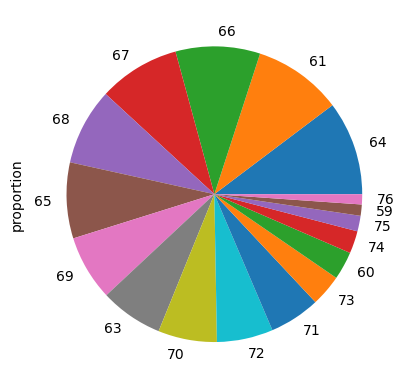

In [ ]:
heights.value_counts(normalize=True).plot.pie()
plt.show()

Pie charts works better when we have fewer elements. For instance, let's say we want to show the percentage of males and females in our dataset:

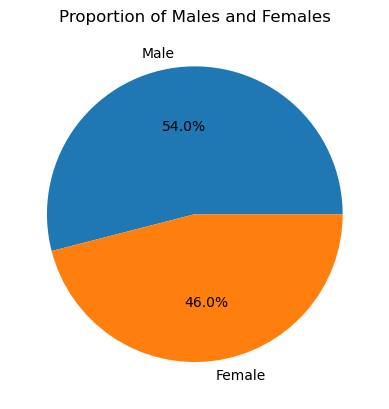

In [ ]:
hw['sex'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title('Proportion of Males and Females')
plt.ylabel('')
plt.show()

While pie charts can be intuitive when there is no specific ordering of the elements we want to show, they often introduce more problems than other chart types. In particular, it's difficult for the human eye to accurately compare angles or assess relative sizes—especially when slices are similar in proportion or not arranged consistently. This can lead to misinterpretation or visual clutter, making bar charts or other alternatives generally more effective for comparing categories.

An illustrative example is below:

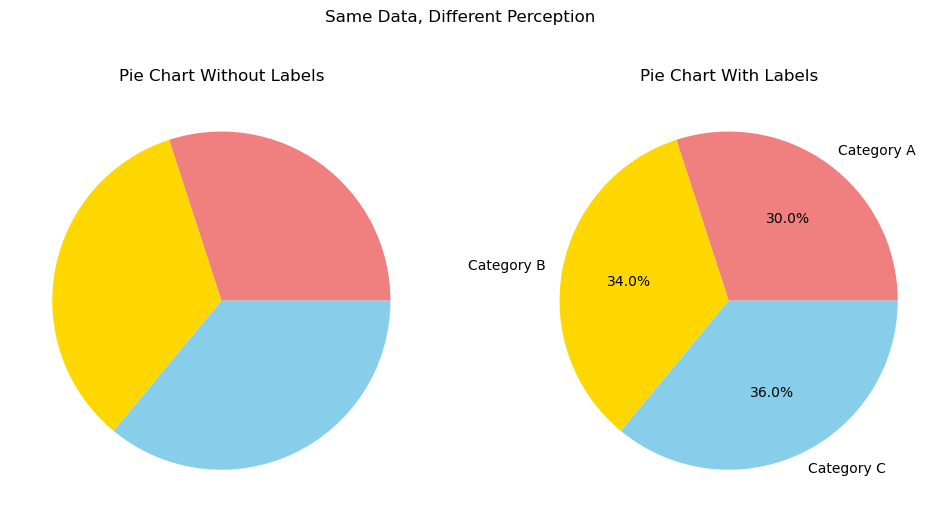

In [ ]:
import matplotlib.pyplot as plt

# Sample data: three categories with similar proportions
sizes = [30, 34, 36]
labels = ['Category A', 'Category B', 'Category C']
colors = ['lightcoral', 'gold', 'skyblue']

fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Pie chart without labels
axs[0].pie(sizes, colors=colors)
axs[0].set_title('Pie Chart Without Labels')

# Pie chart with labels
axs[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
axs[1].set_title('Pie Chart With Labels')

plt.suptitle('Same Data, Different Perception')
plt.show()

The figure shows the same plot with and without labels. Without labels, even significant differences as $4%$ are not easy to spot.

In short: pie charts should be used with extra care!

## Empirical Cumulative Distribution Function (ECDF)

Relative frequencies work particularly well when there are few unique values. However, when the number of unique values grows, the discrete frequencies calculated for the values become very small and thus subject to noise (e.g., due to measurement errors).

Let's now consider the sample of weights and its relative frequencies:

In [ ]:
weights = hw['weight']
weights.value_counts(normalize=True).sort_index()

weight
20.571066    0.003309
20.982487    0.000945
21.188198    0.000473
21.393908    0.000473
21.599619    0.003073
               ...   
59.244669    0.000236
59.450380    0.000236
59.656091    0.001654
60.684644    0.001891
61.301776    0.000236
Name: proportion, Length: 172, dtype: float64

We note that we now have many more unique values (172) and that weights now have decimal values as well.

This suggests that, while heights were discretized—probably rounded when collected—weights were recorded with greater precision. As a result, the weight variable behaves more like a continuous numerical feature, whereas height appears more discretized or categorical in nature. This distinction influences how we visualize and model these variables.

Let's see the plot of absolute frequencies:

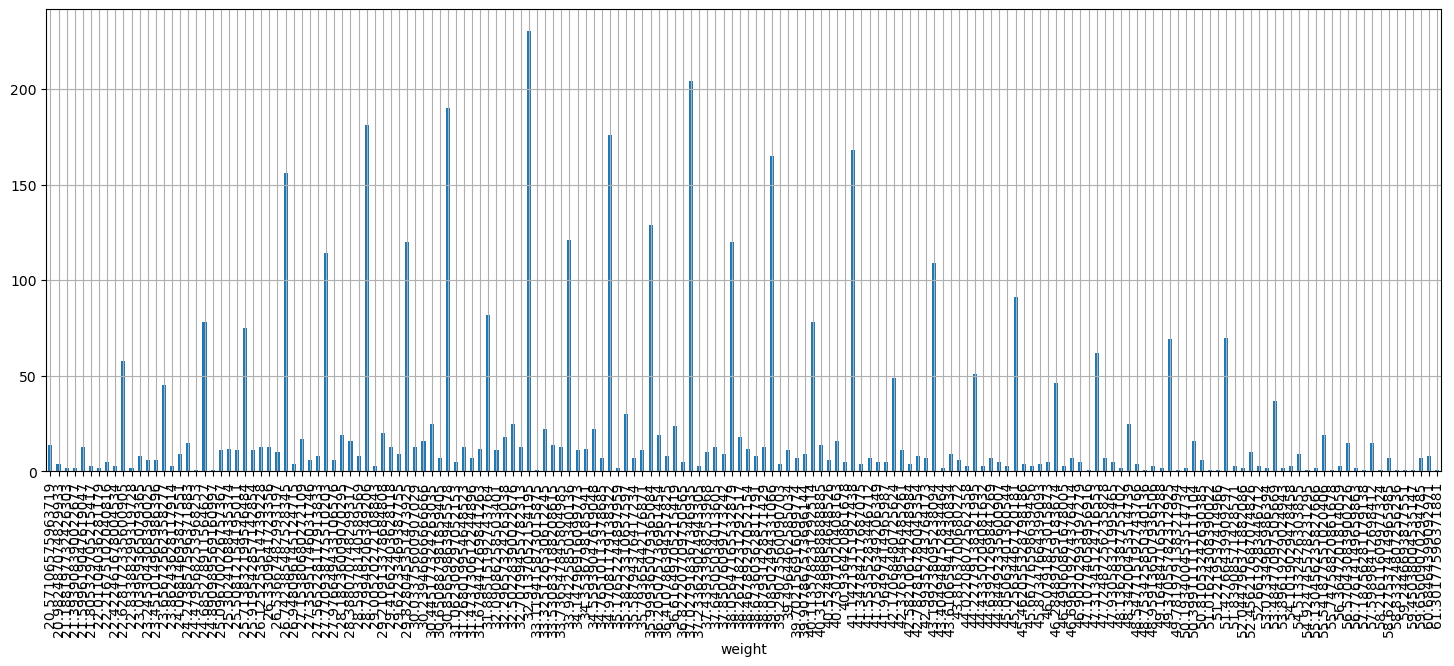

In [ ]:
weights.value_counts().sort_index().plot.bar(figsize=(18,6))
plt.grid()

Not very easy to read, right?

The representation is affected by noise, whereby two very close values are treated as two distinct cases in probability calculations. We will see some ways to overcome this problem. One of them consists of calculating an **Empirical Cumulative Distribution Function (ECDF)**. An **ECDF** calculates for a value $x$ the sum of the relative frequencies of all values $y$ less than or equal to $x$:

$$ECDF(x) = \sum_{a_j: a_j\leq x} f(a_j)$$

Where $a_j$ are the unique values within the sample, while in general $x\in \mathbb{R}$.

Consider a simple dataset of numerical values:

In [ ]:
a = pd.Series([1, 5, 2, 6, 5, 4, 3, 5, 4, 2, 4, 5, 6, 4, 4, 3])
a

0     1
1     5
2     2
3     6
4     5
5     4
6     3
7     5
8     4
9     2
10    4
11    5
12    6
13    4
14    4
15    3
dtype: int64

The relative frequencies will be as follows:

In [ ]:
a.value_counts(normalize=True).sort_index()

1    0.0625
2    0.1250
3    0.1250
4    0.3125
5    0.2500
6    0.1250
Name: proportion, dtype: float64

The ECDF calculated on the unique values will be the following:

In [ ]:
a.value_counts(normalize=True).sort_index().cumsum()

1    0.0625
2    0.1875
3    0.3125
4    0.6250
5    0.8750
6    1.0000
Name: proportion, dtype: float64

It should be noted that the values of the ECDF are always increasing and the last value is equal to 1 (the sum of all relative frequencies).

An ECDF can be represented graphically by placing the $x$ values on the x-axis and the $ECDF(x)$ values on the y-axis. For example, the ECDF of the weights in our weights-heights dataset will be the following:

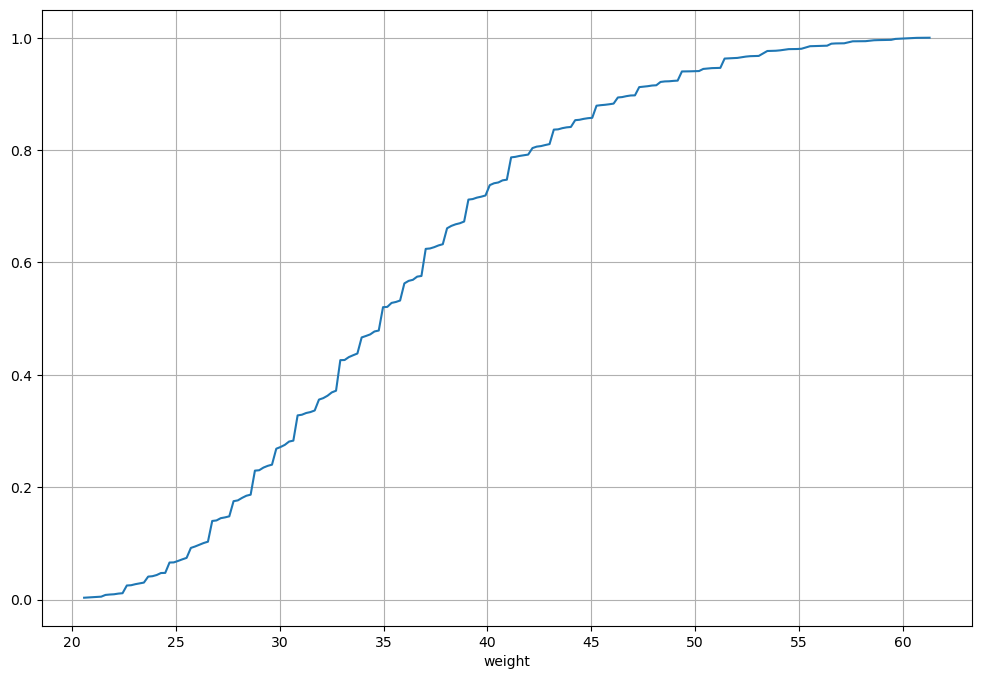

In [ ]:
hw['weight'].value_counts(normalize=True).sort_index().cumsum().plot(figsize=(12,8))
plt.grid()

The definition of the ECDF tells us that, given a point with coordinates $(x,y)$, the sum of the frequencies of elements less than or equal to $x$ is equal to $y$. Alternatively, we can say that $y\%$ of the elements have a value less than $x$.

Observing the graph above, we can say that:
* Approximately $40\%$ of subjects have a weight less than $\approx 33$ pounds (about $66kg$);
* Approximately $80\%$ of subjects have a weight less than $\approx 42$ pounds (about $84Kg$);

ECDFs are useful for graphically checking if two phenomena have similar distributions. We can, for example, use them to compare the weight distributions of men and women:

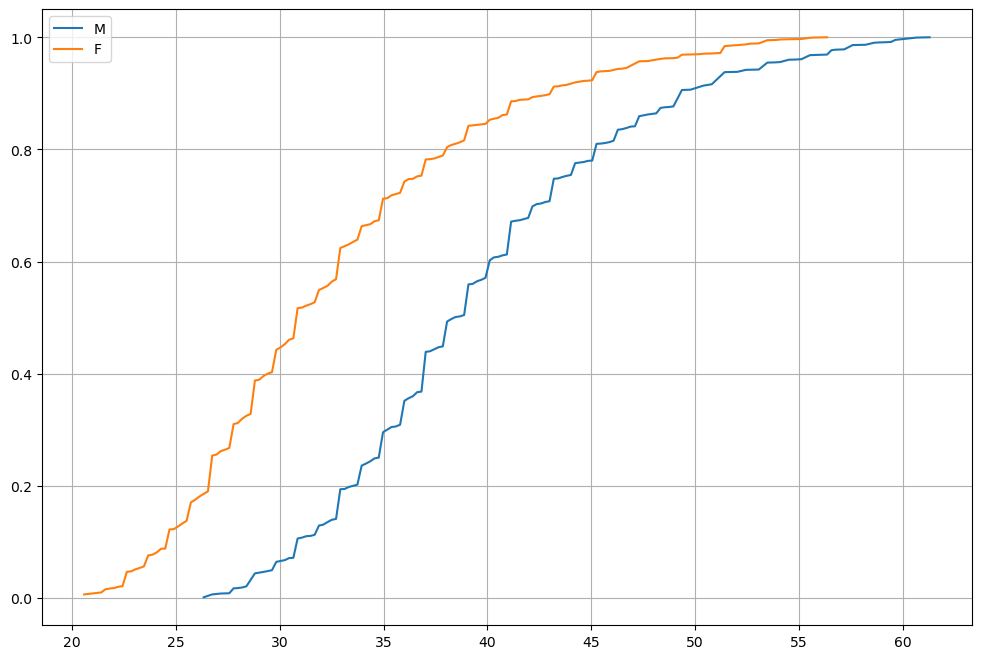

In [ ]:
ecdf_weight_m = hw[hw['sex']=='M']['weight'].value_counts(normalize=True).sort_index().cumsum()
ecdf_weight_f = hw[hw['sex']=='F']['weight'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(12,8))
plt.plot(ecdf_weight_m.index, ecdf_weight_m.values)
plt.plot(ecdf_weight_f.index, ecdf_weight_f.values)
plt.legend(['M','F'])
plt.grid()
plt.show()

Observing the graph above, we can say that:
* Approximately $40\%$ of men weigh less than $80Kg$;
* Approximately $40\%$ of women weigh less than $60Kg$;
* $100\%$ of men weigh less than $140Kg$;
* $100\%$ of women weigh less than $130Kg$.

In general, the graph above tells us that men tend to be heavier than women.

## Histograms

Another way to fix the noise problem is to group similar observations in the same "class". In practice, we will define intervals, which we call "bins" and assign each element to its corresponding bin. While this can be done in a variety of ways, bins are often chosen to be equals. This can be done using the cut function of Pandas:

In [ ]:
heights_quantized = pd.cut(heights, bins=10)
heights_quantized

0       (72.6, 74.3]
1       (69.2, 70.9]
2       (60.7, 62.4]
3       (67.5, 69.2]
4       (65.8, 67.5]
            ...     
4226    (67.5, 69.2]
4227    (67.5, 69.2]
4228    (62.4, 64.1]
4229    (62.4, 64.1]
4230    (60.7, 62.4]
Name: height, Length: 4231, dtype: category
Categories (10, interval[float64, right]): [(58.983, 60.7] < (60.7, 62.4] < (62.4, 64.1] < (64.1, 65.8] ... (69.2, 70.9] < (70.9, 72.6] < (72.6, 74.3] < (74.3, 76.0]]

Let's visualize absolute frequencies of this binned version of the data:

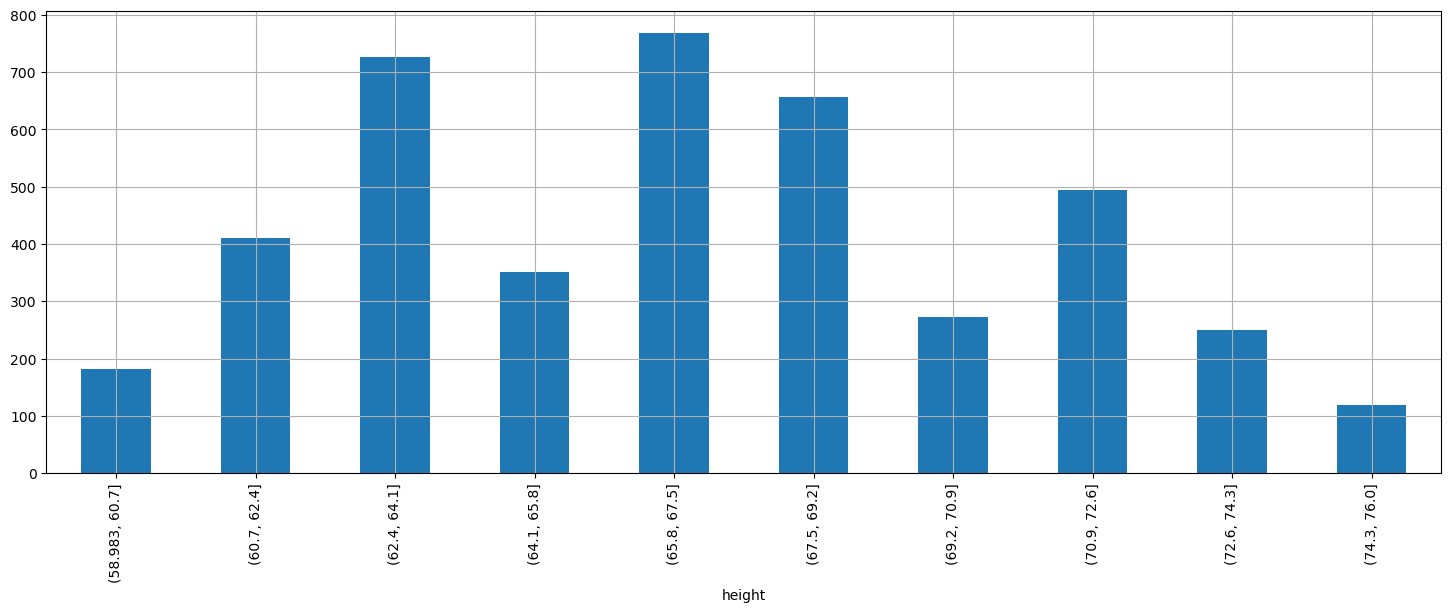

In [ ]:
heights_quantized.value_counts().sort_index().plot.bar(figsize=(18,6))
plt.grid()
plt.show()

The visualization we obtain is an histogram, and can be obtained also as follows:

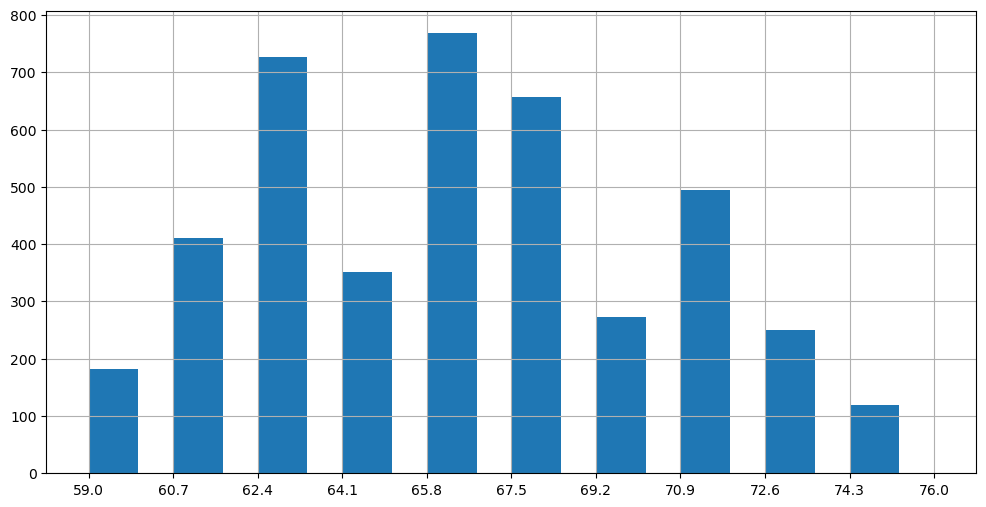

In [ ]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(heights, width=1, bins=10) # We capture the "edges" of the bins
plt.xticks(edges) # Set x-ticks to the edges of the bins for better readability
plt.grid()
plt.show()

Each histogram "bin" covers a specific range. Common practice is to divide the data range, from minimum to maximum, into a certain number of bins of equal width.

#### Choosing the Number of Bins: Sturges and Rice

The number of bins can be specified arbitrarily or determined based on the graphical result you want to achieve. There are two heuristic criteria for finding starting values:

* Sturges: $\#bins=3.3\log(n)$
* Rice: $\#bins=2\cdot n^{1/3}$

Where $n$ is the number of elements.

It should be noted that the number of bins can change the graphical result. Below are two examples obtained by calculating the number of bins with the two criteria considered:

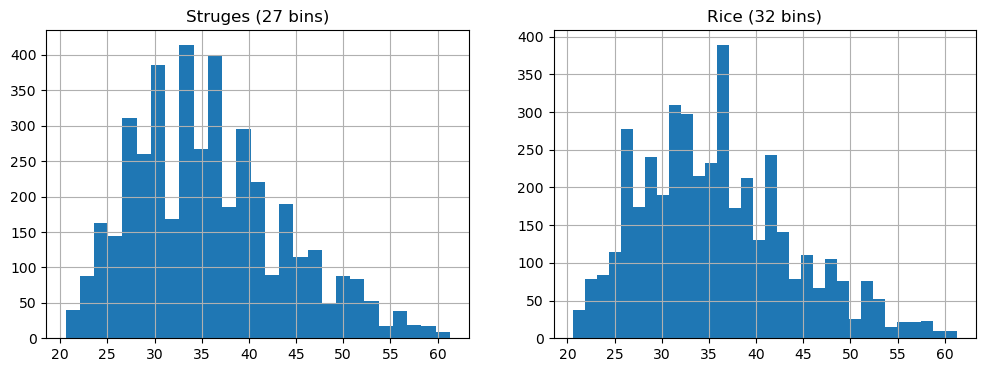

In [ ]:
import numpy as np
bins_struges=int(3.3*np.log(len(weights)))
bins_rice=int(2*len(weights)**(1/3))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
plt.hist(weights, bins=bins_struges)
plt.grid()
plt.subplot(1,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
plt.grid()
plt.hist(weights, bins=bins_rice)
plt.show()

Alternatively, we can define arbitrary ranges for our bins. For example, considering the following limits for the bins `[20,25,30,35,40,45,50,55,60,65]`, we would obtain the following histogram:

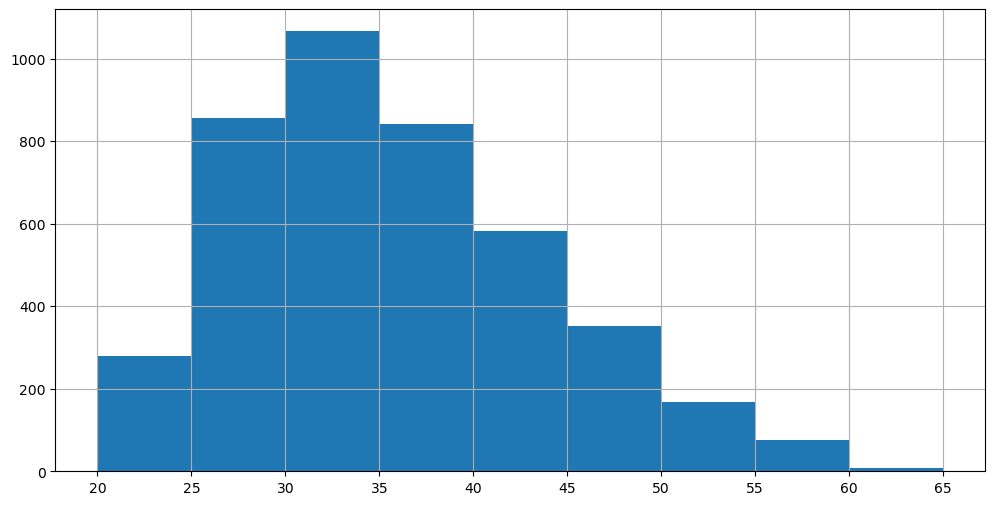

In [ ]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(weights, bins=[20,25,30,35,40,45,50,55,60,65]) # construct a histogram with defined bins
plt.xticks(edges)
plt.grid()
plt.show()

The histogram shown above reports the absolute frequencies for each bin and allows us to answer questions such as "how many subjects have a weight between $30$ and $35$ pounds"?

In particular cases, it is also possible to define histograms with bins of variable size. For example:

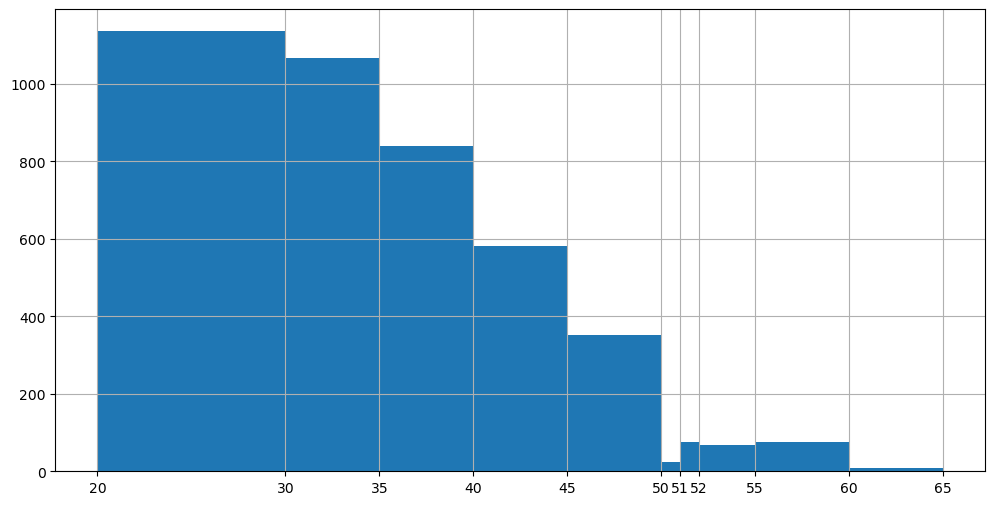

In [ ]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(weights, bins=[20,30,35,40,45,50,51,52,55,60,65]) # construct a histogram with the defined bins
plt.xticks(edges)
plt.grid()
plt.show()

### Comparing Samples Using Histograms

Histograms can be useful for comparing samples. The following graph compares the weights of men and women in our weights-heights sample:

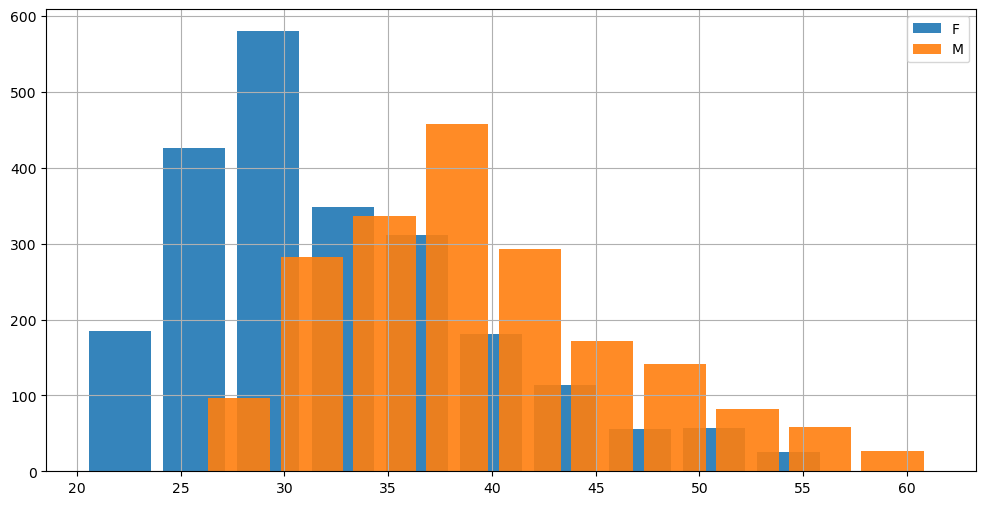

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(hw[hw['sex']=='F']['weight'], alpha=0.9, width=3)
plt.hist(hw[hw['sex']=='M']['weight'], alpha=0.9, width=3)
plt.legend(['F','M'])
plt.grid()
plt.show()

Note that we can obtain a similar results directly from Pandas using the "groupby" function:

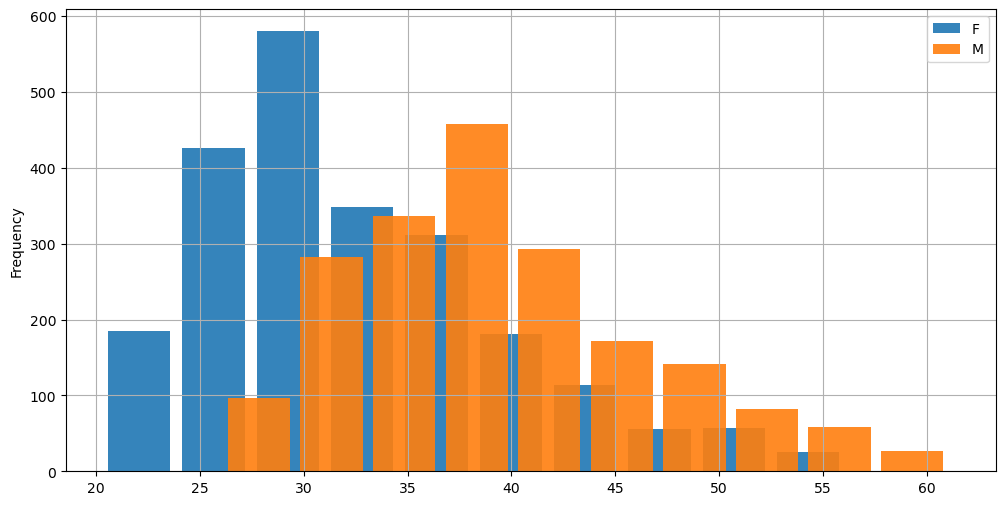

In [ ]:
hw.groupby('sex')['weight'].plot.hist(width=3, alpha=0.9, figsize=(12,6))
plt.legend()
plt.grid()
plt.show()

### Density Estimation
One disadvantage of histograms is that they arbitrarily categorize continuous data using bins. The choice of bin intervals changes the final appearance of the histogram.

Density estimation attempts to solve this problem by obtaining a "continuous" version of the histogram. Instead of dividing the $x$-axis into bins, density estimation calculates a value for each point on the $x$-axis, thus obtaining a continuous representation.

We will look more closely at how density estimation is performed later in the course. In the one-dimensional case, it can be calculated as shown in the optional deep dive below. For now, we know that density estimation can be calculated with a dedicated function "density" that depends on a single **bandwidth** parameter (with a good default value being computed by the libraries), determining the "sensitivity to detail" of the density estimation.

Let's compare the weight density estimation in our weight-height dataset with its corresponding histogram:

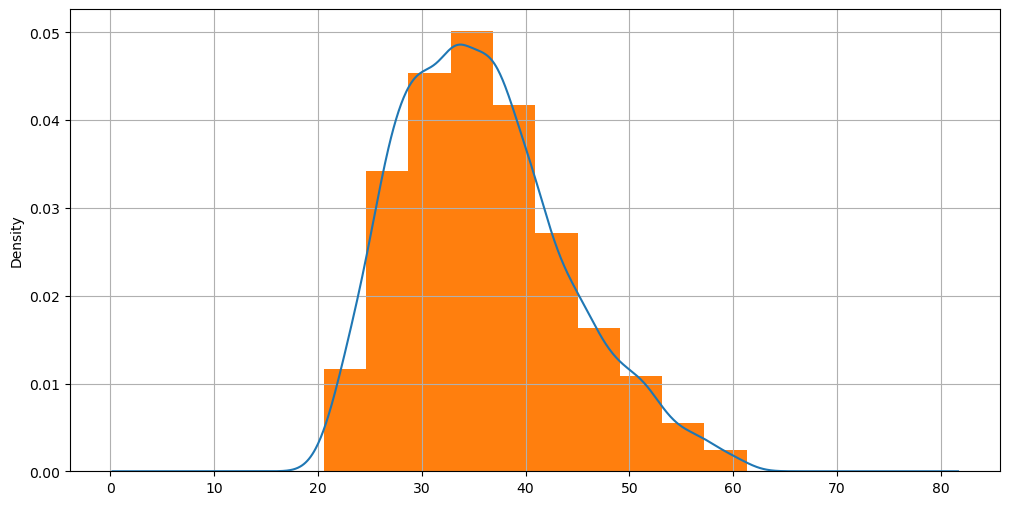

In [ ]:
hw['weight'].plot.density(figsize=(12,6))
plt.hist(hw['weight'], density=True)
plt.grid()
plt.show()

If in the case of histograms changing the number of bins changed the graphical result, here it is changing the bandwidth that changes the graphical result. The following graph shows several examples of density estimation with different bandwidth values:

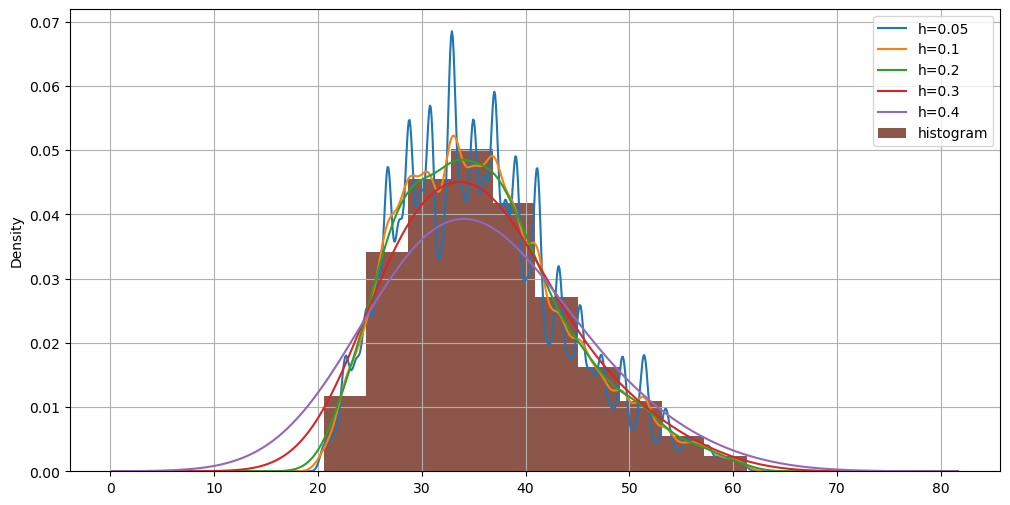

In [ ]:
fig, ax = plt.subplots()
hw['weight'].plot.density(figsize=(12,6), bw_method=0.05)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.1)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.2)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.5)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.8)
plt.hist(hw['weight'], density=True)
ax.legend(['h=0.05','h=0.1','h=0.2','h=0.3','h=0.4','histogram'])
plt.grid()
plt.show()

We can compare two samples using density estimations in Pandas very easily as follows:

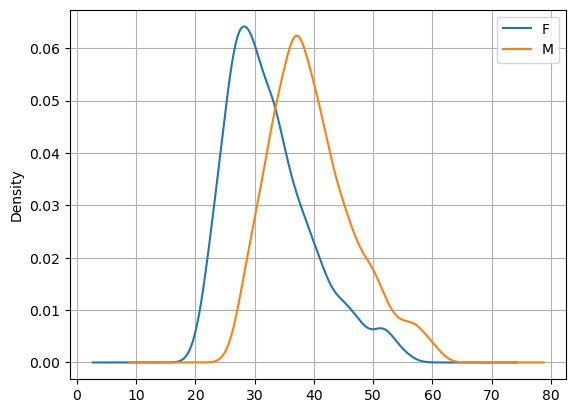

In [ ]:
hw.groupby('sex')['weight'].plot.density()
plt.legend()
plt.grid()
plt.show()

We can also mix histograms and density plots as follows:

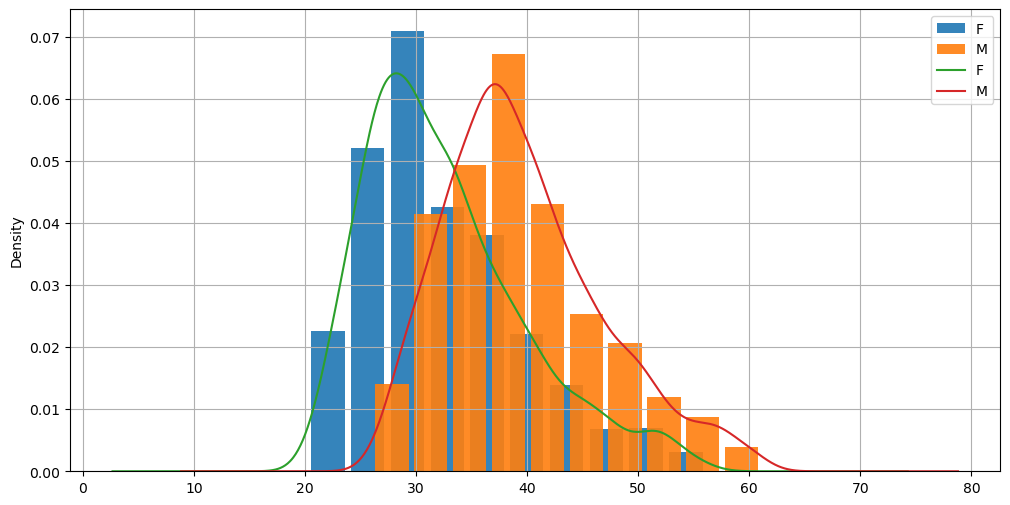

In [ ]:
hw.groupby('sex')['weight'].plot.hist(width=3, alpha=0.9, figsize=(12,6), density=True) # density=True to normalize the histograms
hw.groupby('sex')['weight'].plot.density()
plt.legend()
plt.grid()
plt.show()

In this case, we had to specify "density=True" when computing the histogram to make sure that the ranges on the y axes of density estimation and histogram were the same. This leads us to a **density histogram**. We will see the theoretical details of this in a later lecture.

## Summary Statistics

For now, we have seen graphical ways to represent the data. In practice, it can be useful to attach some numerical values to the data in order to summarize it.

**Descriptive statistics** deals with describing, representing, and summarizing a data sample pertaining to a population. The tools of descriptive statistics can be both numerical and graphical. The analyzed data can be described according to various aspects. Therefore, there are various objective "indicators":
 * **sample size**;
 * **central indicators**: mean, median, mode;
 * **Dispersion indicators**: extremes, range, quantiles, percentiles, quartiles, interquartile range, variance;

We will investigate these tools on the `Titanic` dataset. Let's load it:

In [ ]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will start by focusing on the **univariate** sample of ages:

In [ ]:
age = titanic['Age']
age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

The sample contains `NaN` values, which will have to be handled appropriately.

## Size

The size of a univariate sample $\{x^{(i)}\}_i^N$ is given by the number of values it contains: $|\{x^{(i)}\}_i^N| = N$. The size of each column can also be different as there may be missing values, generally indicated by `NA` or `NaN`. In our case:

In [ ]:
age.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


The summary above indicates that, although we have $891$ values, only $714$ of these are non-null. These are the "real" size of the sample.

## Measures of central tendency

Central measures give an approximate idea of the order of magnitude of the sample values.

### Mean

The mean of a sample is defined as the sum of its values divided by its size:

$$\overline X = \frac{1}{N}\sum_i^N x^{(i)}$$

The mean of our sample will be:

In [ ]:
age.mean()

np.float64(29.69911764705882)

Note that the mean function will automatically ignore the missing data.

This statistic is very easy to interpret: the average age is about 30 years.

Let's see where this descriptive statistic stands in a graphical representation of the density of the sample:

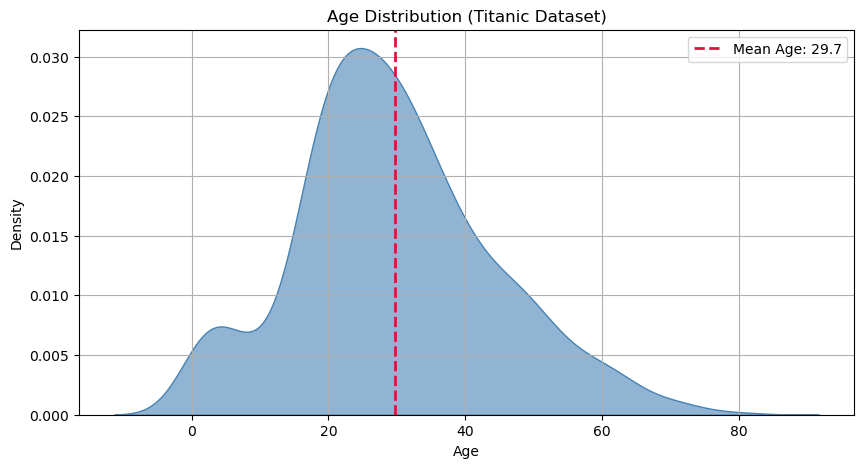

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute mean
mean_age = ages.mean()

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)
plt.axvline(mean_age, color='crimson', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

# Customize plot
plt.title('Age Distribution (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### Median

When the elements of a sample can be ordered (for example, if they are numerical values), the median of a sample (or the median element) is the element that divides the ordered set of sample values into two equal parts.

The median element can be obtained by ordering the sample values and proceeding as follows:

* If the number of elements is odd, take the central element. For example $[1,2,\mathbf{2},3,5] \to 2$.
* If the number of elements is even, take the average of the two central ones. For example $[1,2,\mathbf{2},\mathbf{3},3,5] \to \frac{2+3}{2} = 2.5$.

In the case of our sample:

In [ ]:
print("Median value:",age.median())

Median value: 28.0


From a formal point of view, if we have $n$ observations $x^{(1)}, \ldots, x^{(n)}$, which can be ordered as $x^{(i_i)},\ldots, x^{(i_n)}$, the calculation of the median can be expressed as follows:

$$
\tilde x_{0.5} = \begin{cases}
x_{(n+1)/2} & \text{if } n \textit{ is odd}\\
    \frac{1}{2}(x_{n/2}+x_{n/2+1}) & \text{otherwise.}
\end{cases}
$$

To be convinced of the above formulation, we can see tw toy examples:

In [ ]:
odd_sample = pd.Series([1,2,3,4,100])
print(odd_sample.sort_values())
odd_sample.median()

0      1
1      2
2      3
3      4
4    100
dtype: int64


3.0

The median is the central element 3.

In [ ]:
even_sample = pd.Series([1,2,3,4,5,100])
print(even_sample.sort_values())
even_sample.median()

0      1
1      2
2      3
3      4
4      5
5    100
dtype: int64


3.5

The median is the average between the two central elements 3 and 4.

Let's see where this descriptive statistic stands in a graphical representation of the density of the sample:

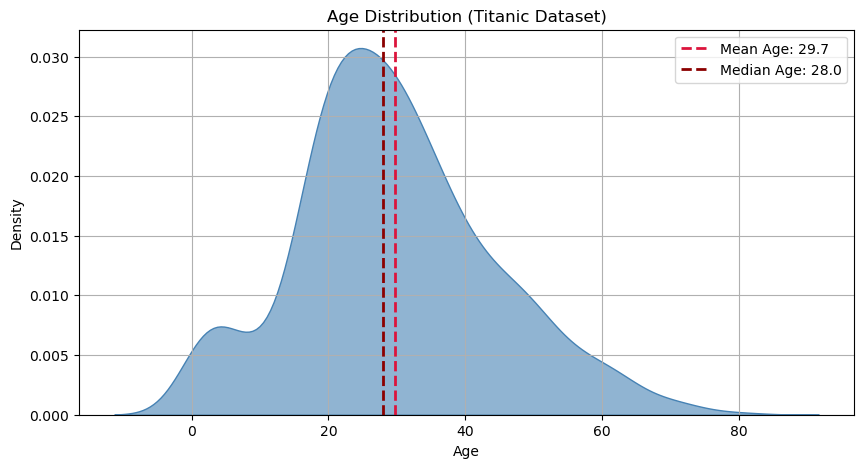

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute median
median_age = ages.median()
mean_age = ages.mean()

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)
plt.axvline(mean_age, color='crimson', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
plt.axvline(median_age, color='darkred', linestyle='--', linewidth=2, label=f'Median Age: {median_age:.1f}')

# Customize plot
plt.title('Age Distribution (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

As we can see, depending on the density of the data, the two values are not always identical.

### Quantiles, Percentiles, and Quartiles

Quantiles, percentiles, and quartiles generalize the concept of the median.

#### Quantiles
A quantile of order $\alpha$ is a value $q_\alpha$ that divides a sample into two parts with sizes proportional to $\alpha$ and $1-\alpha$. Values less than or equal to $q_\alpha$ belong to the first part of the division, while values greater than $q_\alpha$ belong to the second part.

For example, given the already ordered sample `[1,2,3,3,4,5,6,6,7,8,8,9]`, a quantile $q_{0.25}$ will divide the sample into two parts with sizes proportional to $0.25$ and $1-0.25=0.75$. In this case $q_{0.25}=3$ and the two parts will be `[1,2,3,3]` and `[4,5,6,6,7,8,8,9]`.

In this case too, as with the median, averages of adjacent values are taken where appropriate.

Quantiles should be interpreted as follows:

> If a quantile of order $\alpha$ is equal to the number $x$, then it means that $\alpha \times n$ elements have a value less than or equal to $x$, where $n$ is the number of elements in the sample.

It should be noted that:
* The minimum is a quantile of order 0;
* The maximum is a quantile of order 1;
* The median is a quantile of order 0.5.

Let's see some examples on our sample:

In [ ]:
print("Order 0 Quantile (minimum):", age.quantile(0))
print("Order 0.5 Quantile (median):", age.quantile(0.5))
print("Order 1 Quantile (maximum):", age.quantile(1))
print("Order 0.15 Quantile:", age.quantile(0.15))

Order 0 Quantile (minimum): 0.42
Order 0.5 Quantile (median): 28.0
Order 1 Quantile (maximum): 80.0
Order 0.15 Quantile: 17.0


From the above data we deduce that:
* $50\%$ of the passengers are younger than 28.
* $15\%$ of the passengers are younger than 17.

#### Percentiles
Percentiles are simply quantiles expressed as a percentage. A quantile of order $0.25$ is a percentile of order $25\%$. In practice, we still use the quantile function to compute them:

In [ ]:
age.quantile(25/100)

np.float64(20.125)

#### Quartiles

Quartiles are specific quantiles that divide the sample into four parts. In particular:

* The quartile of order 0 is a quantile of order 0;
* The quartile of order 1 is a quantile of order $1/4=0.25$;
* The quartile of order 2 is a quantile of order $2/4=0.5$;
* The quartile of order 3 is a quantile of order $3/4=0.75$;
* The quartile of order 4 is a quantile of order $4/4=1$.

Also in this case, we use the quantile function:

In [ ]:
print("Quartile of order 0 (minimum):", age.quantile(0/4))
print("Quartile of order 1:", age.quantile(1/4))
print("Quartile of order 2 (median):", age.quantile(2/4))
print("Quartile of order 3:", age.quantile(3/4))
print("Quartile of order 4 (maximum):", age.quantile(4/4))

Quartile of order 0 (minimum): 0.42
Quartile of order 1: 20.125
Quartile of order 2 (median): 28.0
Quartile of order 3: 38.0
Quartile of order 4 (maximum): 80.0


Let's see this in graphical terms:

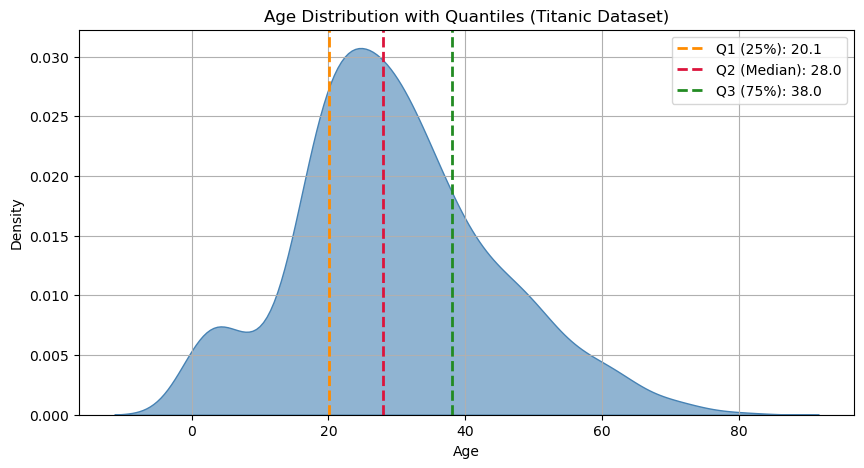

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute quantiles
q1 = ages.quantile(0.25)
q2 = ages.median()  # same as 0.5
q3 = ages.quantile(0.75)

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)

# Overlay quantile lines
plt.axvline(q1, color='darkorange', linestyle='--', linewidth=2, label=f'Q1 (25%): {q1:.1f}')
plt.axvline(q2, color='crimson', linestyle='--', linewidth=2, label=f'Q2 (Median): {q2:.1f}')
plt.axvline(q3, color='forestgreen', linestyle='--', linewidth=2, label=f'Q3 (75%): {q3:.1f}')

# Customize plot
plt.title('Age Distribution with Quantiles (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### Mode
The **mode** of a sample is the value that appears **most frequently** within the data. It represents the most common observation. It can se computed as follows:

In [ ]:
age.mode()

0    24.0
Name: Age, dtype: float64

In formal terms, the mode $\overline x_M$ of a sample is given by:

$$\overline x_M = a_j \Leftrightarrow n_j = \max\{n_1,\ldots,n_k\}$$

Where:
- $a_j$ are the unique values of the sample (values without repetition)
- $n_j$ are their respective absolute frequencies (how many times a value repeats)

Let's see this with a toy example:

Let's see how to compute it manually, with a toy example:

In [ ]:
data=pd.Series([1,2,3,4,2,5,4,2,6,5,8,4,3,2,3])
data

0     1
1     2
2     3
3     4
4     2
5     5
6     4
7     2
8     6
9     5
10    8
11    4
12    3
13    2
14    3
dtype: int64

The unique values $a_j$ with the respective absolute frequencies $n_j$ (counts) are computed as:

In [ ]:
print(data.value_counts())

2    4
3    3
4    3
5    2
1    1
6    1
8    1
Name: count, dtype: int64


In the output above, the first column represents the unique values $a_j$, while the second column represents the absolute frequencies $n_j$. Since the list is already sorted by counts, we can extract the maximum as follows:

In [ ]:
print("Mode:\n",data.value_counts().index[0])

Mode:
 2


The mode is $2$ as this number repeats most times (it repeats $4$ times).

In graphical terms:

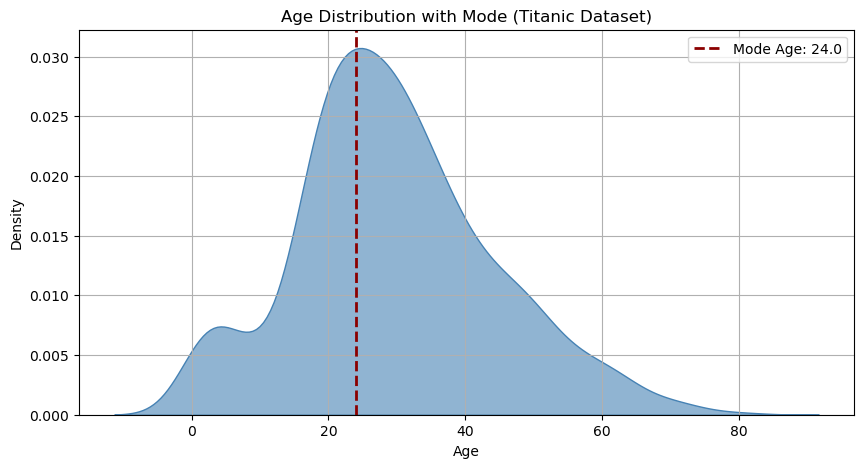

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute mode (may return multiple values, so we take the first)
mode_age = ages.mode().iloc[0]

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)
plt.axvline(mode_age, color='darkred', linestyle='--', linewidth=2, label=f'Mode Age: {mode_age:.1f}')

# Customize plot
plt.title('Age Distribution with Mode (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

The mode is the "peak" of the density of the data as it represents the most common value.

## Measures of Dispersion

Measures of dispersion serve to quantify to what extent the values of a distribution are "dispersed", or "far from each other".

### Minimum, Maximum, and Range
Simple indices of dispersion are the minimum ($min \{x^{(i)}\}_i^N$), the maximum ($max \{x^{(i)}\}_i^N$), and the range ($max \{x^{(i)}\}_i^N$ - $min \{x^{(i)}\}_i^N$). These are easily computed as follows:

In [ ]:
print("Min value:",age.min())
print("Max value:",age.max())
print("Range:",age.max()-age.min())

Min value: 0.42
Max value: 80.0
Range: 79.58


Let's see this graphically:

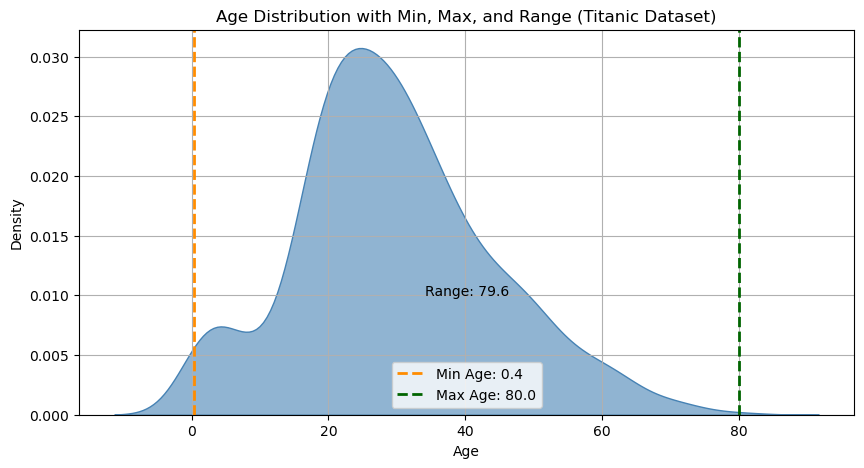

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute statistics
min_age = ages.min()
max_age = ages.max()
range_age = max_age - min_age

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)

# Overlay vertical lines
plt.axvline(min_age, color='darkorange', linestyle='--', linewidth=2, label=f'Min Age: {min_age:.1f}')
plt.axvline(max_age, color='darkgreen', linestyle='--', linewidth=2, label=f'Max Age: {max_age:.1f}')

# Annotate range
plt.text((min_age + max_age)/2, 0.01, f'Range: {range_age:.1f}', color='black', ha='center', fontsize=10)

# Customize plot
plt.title('Age Distribution with Min, Max, and Range (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

We can see that there is some density before 0 because the density estimation function "interpolates" what may happen before the zero if we had data there. This is an artifacts of the continuous nature of this visualization.

### Interquartile Range (IQR)

The range is not a very robust measure of dispersion, as it does not take into account the presence of any outliers. Consider, for example, the following "artificial" samples:

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
sample1 = np.linspace(3,7,10)
sample2 = sample1.copy()
sample2[0]=-5 # we replace two values with the outliers -5
sample2[-1]=15 # and 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})
print(df)

# df.plot.box()
# plt.grid()
# plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

         s1         s2
0  3.000000  -5.000000
1  3.444444   3.444444
2  3.888889   3.888889
3  4.333333   4.333333
4  4.777778   4.777778
5  5.222222   5.222222
6  5.666667   5.666667
7  6.111111   6.111111
8  6.555556   6.555556
9  7.000000  15.000000
Range sample 1: 4.0
Range sample 2: 20.0


The samples are similar, but the presence of two outliers (-5 and 15) in the second sample makes the ranges very different (4 and 20).

A **more expressive measure of dispersion** is therefore the **interquartile range** (or **interquartile distance**), which is measured as the difference between the third and first quartiles:

In [ ]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("The interquartile range of sample 1 is:",q13-q11)
print("The interquartile range of sample 2 is:",q23-q21)

The interquartile range of sample 1 is: 2.0
The interquartile range of sample 2 is: 2.0


Let's see how to compute the IQR in the case of the Age sample:

In [ ]:
q1,q3 = age.quantile([1/4,3/4])
print("The interquartile range of age is:",q3-q1)

The interquartile range of age is: 17.875


Graphically:

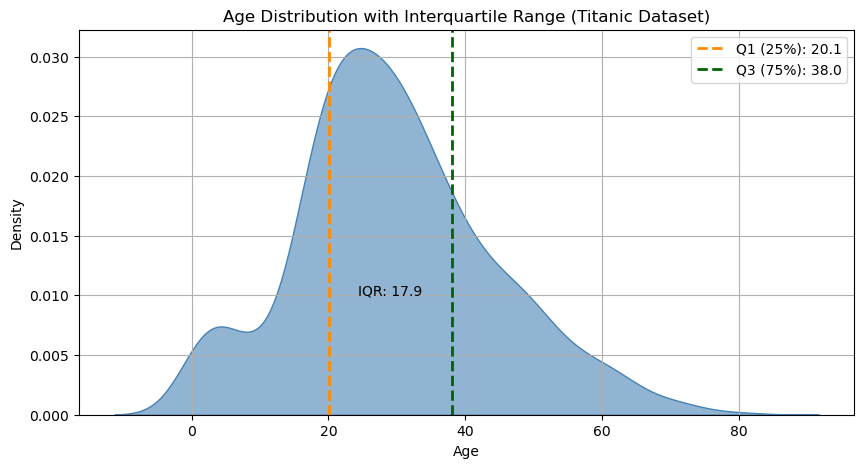

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic['Age'].dropna()

# Compute Q1, Q3, and IQR
q1 = ages.quantile(0.25)
q3 = ages.quantile(0.75)
iqr = q3 - q1

# Plot density
plt.figure(figsize=(10,5))
sns.kdeplot(ages, fill=True, color='steelblue', alpha=0.6)

# Overlay vertical lines for Q1 and Q3
plt.axvline(q1, color='darkorange', linestyle='--', linewidth=2, label=f'Q1 (25%): {q1:.1f}')
plt.axvline(q3, color='darkgreen', linestyle='--', linewidth=2, label=f'Q3 (75%): {q3:.1f}')

# Annotate IQR
plt.text((q1 + q3)/2, 0.01, f'IQR: {iqr:.1f}', color='black', ha='center', fontsize=10)

# Customize plot
plt.title('Age Distribution with Interquartile Range (Titanic Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### Variance and Standard Deviation

**Variance** (also known as **mean squared deviation**) provides an estimate of how much the observed data deviates from the mean. Variance calculates the mean of the squares of the deviations of the values from the mean, penalizing large deviations from the mean value (due to outliers) more heavily than small deviations:

$$s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n}$$

It can be shown that, when computing variance from smaller samples, it can lead to **biased estimates**. Hence, it is very common to use the **Sample variance** with $n-1$ in the denominator:

$$s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n-1}$$

We will see it better later in the course, but for now consider that:
 - The variance formula can be used when we have access to the whole population;
 - The sample variance formula should be used in all other cases;
 - When sample size is large enough, the two give very similar result (for large values of n: $n-1 \approx n$).

Here we use the symbol $s$ instead of the symbol $\sigma$ seen in the case of probability distributions, because $s$ is a value "estimated" from the data and not "theoretical" as in the case of $\sigma$. It should be noted, however, that in practice, there is no universal convention, so in many cases $\sigma$ is also used for estimated values.

We can attribute a geometric meaning to variance, as shown in the graph below:

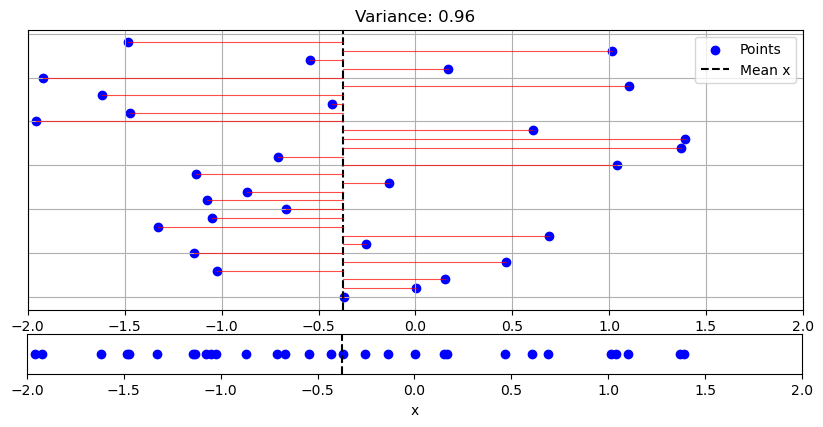

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(41)
n = 30
x = np.random.randn(n) -0.1
y = np.arange(n)

# Calculate the mean of the x component
mean_x = np.mean(x)

# Create the 2D plot
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.title(f"Variance: {np.var(x):0.2}")
plt.scatter(x, y, label='Points', color='blue')

# Plot the mean of x as a black dashed line
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')

# Plot red lines connecting points to the mean x
for i in range(n):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r-', linewidth=0.8, alpha=0.7)

# Axis labels and legend
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Remove numbers and ticks on the y-axis of the top subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.grid()
plt.xlim([-2,2])

plt.subplot(212)
plt.scatter(x, np.zeros_like(x), label='Points', color='blue')
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')
plt.xlim([-2,2])

# Adjust the dimensions of the bottom subplot
plt.gca().set_position([0.124, 0.45, 0.775, 0.05])
plt.xlabel('x')
# Remove labels and numbers on the y-axis of the bottom subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

In the graph, the bottom plot shows a univariate sample $\{x_i\}_i^N$. The top plot shows the same sample "exploded" on the $y$-axis for visualization purposes. In the top plot, the black dashed line indicates the sample mean, while the red lines are the terms $(x_i-\overline x)$ that appear in the variance formula. The variance calculates the average of the lengths of these segments.

The following graph shows a less "dispersed" sample:

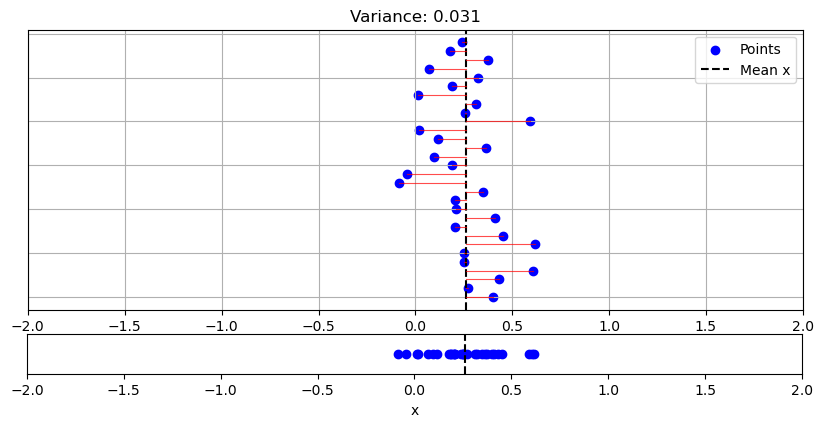

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)
n = 30
x = np.random.randn(n)*0.2+0.3
y = np.arange(n)

# Calculate the mean of the x component
mean_x = np.mean(x)

# Create the 2D plot
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.title(f"Variance: {np.var(x):0.2}")
plt.scatter(x, y, label='Points', color='blue')

# Plot the mean of x as a dashed black line
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')

# Plot red lines connecting the points to the x mean
for i in range(n):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r-', linewidth=0.8, alpha=0.7)

# Axis labels and legend
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Remove numbers and ticks on the y-axis of the top subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.grid()
plt.xlim([-2,2])

plt.subplot(212)
plt.scatter(x, np.zeros_like(x), label='Points', color='blue')
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')
plt.xlim([-2,2])

# Adjust the dimensions of the bottom subplot
plt.gca().set_position([0.124, 0.45, 0.775, 0.05])
plt.xlabel('x')
# Remove labels and numbers on the y-axis of the bottom subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

The variance of age will be:

In [ ]:
age.var()

211.0191247463081

The dispersion indices seen so far (excluding variance) have the same **unit of measurement** as the input data. In the case of ages, the data are measured in years. It is therefore correct to say that **minimum**, **maximum**, **range**, **interquartile range**, and **mean absolute deviation** calculated on weights are measured in years.

The same does not apply to the variance, which will be measured in **years squared**. If we want to obtain a **commensurable** measure of dispersion, we can calculate the square root of the variance, thus obtaining the **standard deviation** (or **root mean square deviation**), which is defined as follows:

$$s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}{n}(x_i-x^2)}{n}}$$

Similarly, we often use the **sample standard deviation**:

$$s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}{n}(x_i-x^2)}{n-1}}$$

We can compute the standard deviation as follows:

In [ ]:
age.std()

14.526497332334044

Let's see how these measures of dispersion relate to distributions with different shapes. We will consider the ages of passengers in the three classes of the Titanic:

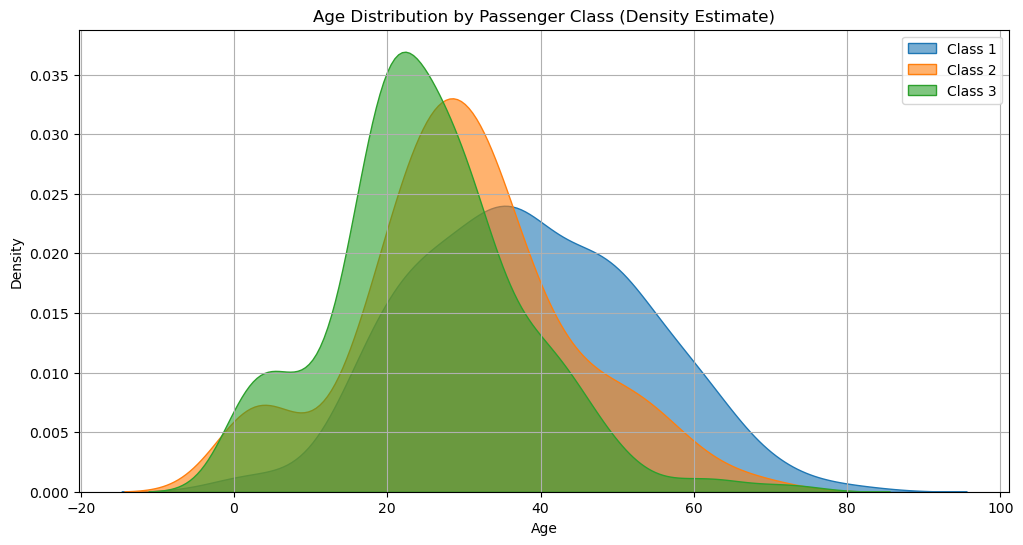


Class 1 ages:
Mean: 38.233440860215055
Min: 0.92
Max: 80.0
Range: 79.08
IQR: 22.0
Variance: 219.12454269107818
Std: 14.802855896450462

Class 2 ages:
Mean: 29.87763005780347
Min: 0.67
Max: 70.0
Range: 69.33
IQR: 13.0
Variance: 196.03015190885873
Std: 14.001076812476201

Class 3 ages:
Mean: 25.14061971830986
Min: 0.42
Max: 74.0
Range: 73.58
IQR: 14.0
Variance: 156.13497645102254
Std: 12.495398210982415


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density plot for age across passenger classes
plt.figure(figsize=(12,6))
sns.kdeplot(titanic[titanic['Pclass']==1]['Age'], label='Class 1', fill=True, alpha=0.6)
sns.kdeplot(titanic[titanic['Pclass']==2]['Age'], label='Class 2', fill=True, alpha=0.6)
sns.kdeplot(titanic[titanic['Pclass']==3]['Age'], label='Class 3', fill=True, alpha=0.6)

plt.legend()
plt.grid()
plt.title('Age Distribution by Passenger Class (Density Estimate)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Dispersion measures for each class
for cls in [1, 2, 3]:
    ages = titanic[titanic['Pclass'] == cls]['Age'].dropna()
    print(f"\nClass {cls} ages:")
    print("Mean:", ages.mean())
    print("Min:", ages.min())
    print("Max:", ages.max())
    print("Range:", ages.max() - ages.min())
    q1, q3 = ages.quantile([0.25, 0.75])
    print("IQR:", q3 - q1)
    print("Variance:", ages.var())
    print("Std:", ages.std())

We can see a correspondence between the graphical forms of the distributions and the dispersion measures. Indeed, passengers in class 3 are "less dispersed" and "younger" than in the other classes.

### Data Normalizations
The observed data dispersion indicators strongly depend on the nature of the data and their unit of measurement. For example, ages are measured in years, while weights are in Kg or pounds. Therefore, there are data normalization techniques that make data based on different units of measurement comparable to each other.

#### Normalization between 0 and 1
This normalization scales the data so that the minimum and maximum values are exactly equal to $0$ and $1$, using the following formula:

$$
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
$$

In the case of weights:

In [ ]:
weights_norm = (weights-weights.min())/(weights.max()-weights.min())
weights_norm

0       0.808081
1       0.429293
2       0.353535
3       0.378788
4       0.343434
          ...   
4226    0.080808
4227    0.434343
4228    0.353535
4229    0.191919
4230    0.050505
Name: weight, Length: 4231, dtype: float64

#### Normalization between -1 and 1
In this case, the data are rescaled so that the new minimum and maximum are $-1$ and $1$, using the following formula:

$$
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
$$

We can perform this transformation in Pandas as follows:

In [ ]:
weights_norm2 = (weights.max()+weights.min()-2*weights)/(weights.max()-weights.min())
weights_norm2

0      -0.616162
1       0.141414
2       0.292929
3       0.242424
4       0.313131
          ...   
4226    0.838384
4227    0.131313
4228    0.292929
4229    0.616162
4230    0.898990
Name: weight, Length: 4231, dtype: float64

#### Standardization (z-scoring)

In many cases, it is useful to normalize data so that they have zero mean and unit standard deviation. This type of normalization is called "z-scoring" and is performed by subtracting the mean from the data and dividing by the standard deviation.

$$
z_i = \frac{x_i-\overline x}{s_x}
$$

where $s_x$ is the standard deviation of the population to which $X$ belongs. Note that zeta scores are **dimensionless** (i.e., they have no unit of measurement).

To understand the effect of this normalization, let's observe the density estimates of the samples before and after normalization:

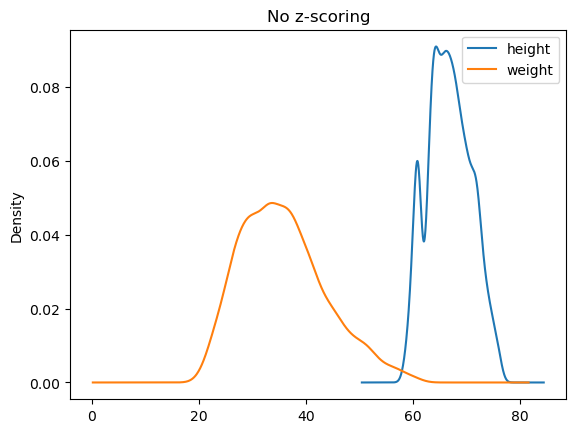

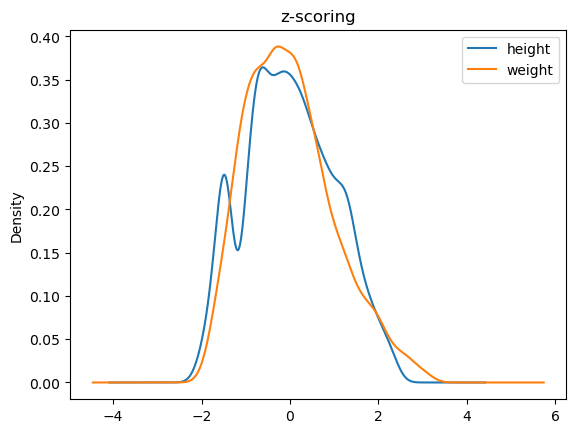

In [ ]:
from scipy.stats import zscore
hwz = hw.copy()
hwz['height'] = zscore(hwz['height'])
hwz['weight'] = zscore(hwz['weight'])

hw.plot.kde()
plt.title('No z-scoring')
plt.show()

hwz.plot.kde()
plt.title('z-scoring')
plt.show()

### Shape Indicators
Let's now look at some indicators that allow us to get an idea of certain aspects of the "shape" of data distribution.

#### Asymmetry (skewness)
Skewness is an indicator of the "imbalance" to the left (negative value) or to the right (positive value) of a data sample with respect to the central value. The formula for skewness is as follows:

$$ \sum_i^n \frac{(x_i-\overline x)^3}{n \cdot s_x^3}$$

The skewness values will be:
* **Negative** if the distribution is skewed to the left;
* **Positive** if the distribution is skewed to the right;
* **Close to zero** in the case of unskewed distributions.

We can compute the skewness as follows

In [ ]:
age.skew()

np.float64(0.38910778230082704)

Let's look at some examples of distributions and skewness:

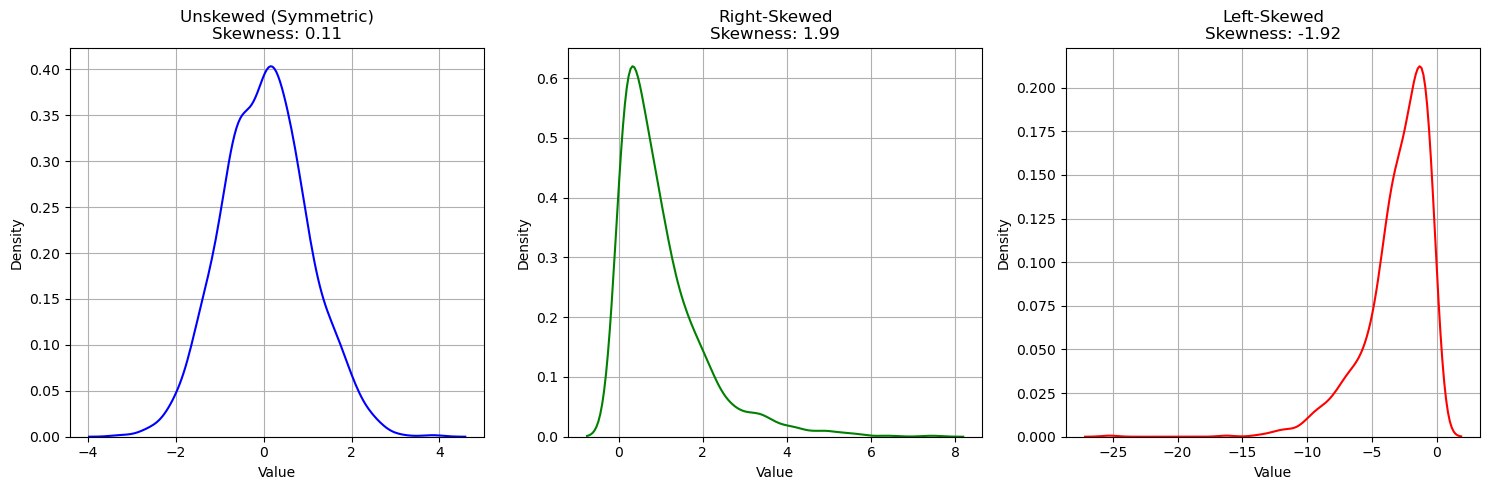

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Generate example data distributions
data_unskewed = np.random.normal(0, 1, 1000)  # Normal distribution (symmetric)
data_right_skewed = np.random.exponential(1, 1000)  # Exponential distribution (right-skewed)
data_left_skewed = -np.random.chisquare(3, 1000)  # Chi-squared distribution (left-skewed)

# Calculate skewness values
skewness_unskewed = stats.skew(data_unskewed)
skewness_right_skewed = stats.skew(data_right_skewed)
skewness_left_skewed = stats.skew(data_left_skewed)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot unskewed distribution with KDE
sns.kdeplot(data_unskewed, ax=axes[0], color='blue')
axes[0].set_title(f"Unskewed (Symmetric)\nSkewness: {skewness_unskewed:.2f}")

# Plot right-skewed distribution with KDE
sns.kdeplot(data_right_skewed, ax=axes[1], color='green')
axes[1].set_title(f"Right-Skewed\nSkewness: {skewness_right_skewed:.2f}")

# Plot left-skewed distribution with KDE
sns.kdeplot(data_left_skewed, ax=axes[2], color='red')
axes[2].set_title(f"Left-Skewed\nSkewness: {skewness_left_skewed:.2f}")

# Add labels and show the plot
for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Kurtosis (kurtosis)
The kurtosis index measures the "thickness" of the tails of a density distribution. It is defined as follows:

$$
K = \frac{1}{n} \sum_{i=1}^{n} \left(\frac{X_i - \bar{X}}{s}\right)^4 - 3
$$

The index is interpreted as follows:
 * If it is greater than zero, the distribution is *leptokurtic*, i.e., more "peaked" than a Normal distribution;
 * If it is less than zero, the distribution is *platykurtic*, i.e., more "flat" than a Normal distribution;
 * If it is equal to zero, the distribution is *mesokurtic*, i.e., the tails are similar to those of a normal distribution.

We will see what a normal distribution is later in the course.

We can compute the kurtosis as follows:

In [ ]:
age.kurtosis()

np.float64(0.17827415364210353)

Let's look at some examples of Kurtosis values:

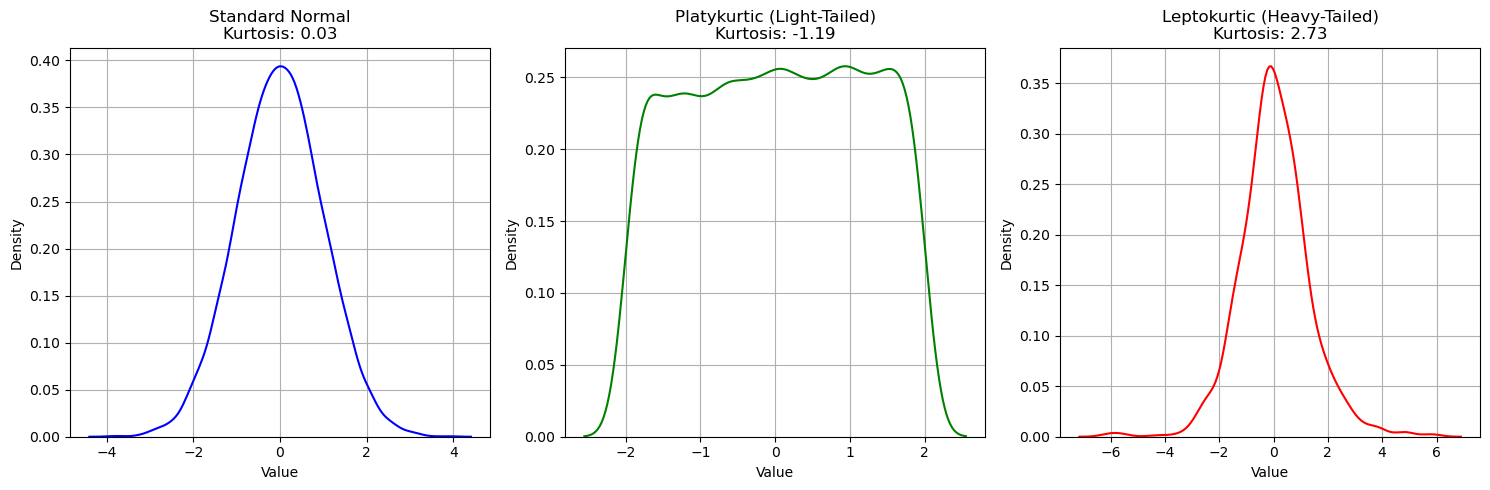

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

np.random.seed(42)
# Generate example data for different distributions
normal_data = np.random.normal(0, 1, 10000)  # Standard normal distribution
platykurtic_data = np.random.uniform(-2, 2, 10000)  # Platykurtic distribution (light-tailed)
leptokurtic_data = np.random.standard_t(5, 1000)  # Leptokurtic distribution (heavy-tailed)

# Calculate kurtosis values
kurtosis_normal = stats.kurtosis(normal_data)
kurtosis_platykurtic = stats.kurtosis(platykurtic_data)
kurtosis_leptokurtic = stats.kurtosis(leptokurtic_data)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot standard normal distribution (mesokurtic) with KDE
sns.kdeplot(normal_data, ax=axes[0], color='blue')
axes[0].set_title(f"Standard Normal\nKurtosis: {kurtosis_normal:.2f}")

# Plot platykurtic distribution (light-tailed) with KDE
sns.kdeplot(platykurtic_data, ax=axes[1], color='green')
axes[1].set_title(f"Platykurtic (Light-Tailed)\nKurtosis: {kurtosis_platykurtic:.2f}")

# Plot leptokurtic distribution (heavy-tailed) with KDE
sns.kdeplot(leptokurtic_data, ax=axes[2], color='red')
axes[2].set_title(f"Leptokurtic (Heavy-Tailed)\nKurtosis: {kurtosis_leptokurtic:.2f}")

# Add labels and show the plot
for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Statistical Summary

When we compute values like **mean**, **median**, **mode**, **minimum**, **maximum**, **range**, **standard deviation**, **variance**, and **interquartile range**, we're building what is known as a **statistical summary** of a dataset. These measures help us understand the **central tendency**, **spread**, and **shape** of a distribution—whether it's symmetric, skewed, concentrated, or dispersed.

In practice, we can obtain many of these summary statistics quickly using the `.describe()` method in **pandas**:

In [ ]:
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

This returns:

- **count**: number of non-missing values  
- **mean**: average value  
- **std**: standard deviation  
- **min** and **max**: smallest and largest values  
- **25%**, **50%**, **75%**: the first quartile (Q1), median (Q2), and third quartile (Q3)

If you want to include other measures like mode or variance, you can compute them separately:

In [ ]:
print(f"Mode (most frequent age): {age.mode()[0]:.1f}")
print(f"Variance: {age.var():.2f}")
print(f"IQR (Interquartile Range): {age.quantile(0.75) - age.quantile(0.25):.2f}")

Mode (most frequent age): 24.0
Variance: 211.02
IQR (Interquartile Range): 17.88


These tools are essential for both exploratory data analysis and communicating insights clearly—whether you're comparing groups, detecting outliers, or preparing data for modeling.

## Boxplots

Boxplots are a compact visualization method for representing certain descriptive characteristics of the data under analysis. In particular, given a sample, a boxplot can effectively represent the following quantities:
 * Median value;
 * First and third quartile;
 * Minimum and maximum (depending on the boxplot's "version," as discussed below).

A boxplot appears as follows:

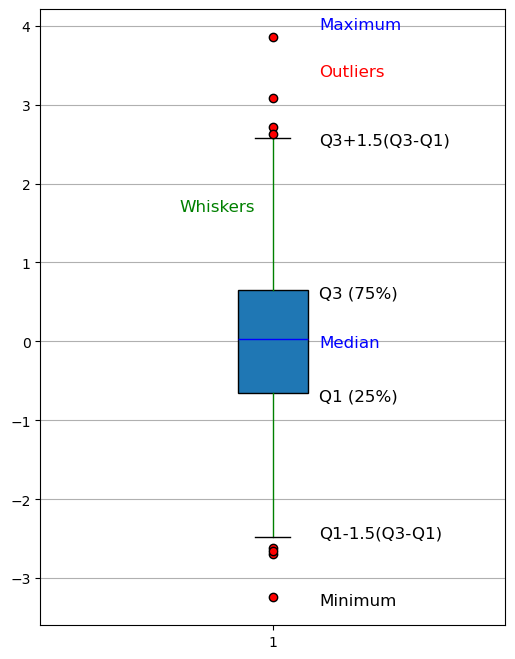

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Create a vertical boxplot with explanatory labels
plt.figure(figsize=(6, 8))
box = plt.boxplot([data], vert=True, patch_artist=True, medianprops={'color': 'blue'}, flierprops={'markerfacecolor':'red'}, whiskerprops=dict(color='green'))

IQR = np.percentile(data, 75) - np.percentile(data, 25)

# Explanatory labels
plt.text(1.1, np.min(data) - 0.1, 'Minimum', fontsize=12, color='black')
plt.text(1.1, np.percentile(data, 25) - 0.1, 'Q1 (25%)', fontsize=12, color='black')
plt.text(1.1, np.median(data) - 0.1, 'Median', fontsize=12, color='blue')
plt.text(1.1, np.percentile(data, 75) - 0.1, 'Q3 (75%)', fontsize=12, color='black')
plt.text(1.1, np.max(data) + 0.1, 'Maximum', fontsize=12, color='blue')
plt.text(1.1, np.max(data) - 0.5, 'Outliers', fontsize=12, color='red')
plt.text(0.8, np.percentile(data, 75) +1, 'Whiskers', fontsize=12, color='green')

plt.text(1.1, np.percentile(data, 75) + 1.5*(IQR)-0.1, 'Q3+1.5(Q3-Q1)', fontsize=12, color='black')
plt.text(1.1, np.percentile(data, 25) - 1.5*(IQR)+0.1, 'Q1-1.5(Q3-Q1)', fontsize=12, color='black')

# Titles and axis labels
plt.grid(axis='y')

plt.show()

The boxplot is shown as a "box" with "whiskers" where:
 * the bottom edge of the box indicates the first quartile;
 * the top edge of the box indicates the third quartile;
 * the horizontal line in the middle of the box represents the median value of the sample;
 * the lower whisker represents the first value in the sample that is greater than or equal to the first quartile minus one and a half times the distance between the third and the first quartile;
 * the upper whisker represents the first value in the sample that is less than or equal to the third quartile plus one and a half times the distance between the third and the first quartile;
 * the dots represent the "out-of-bounds" values that fall outside the interval marked by the whiskers. They are generally considered as "outliers".

To illustrate the usefulness of boxplots, we will consider the dataset of weights and heights seen previously:

In [ ]:
hw

,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390
...,...,...,...
4226,F,69,23.862436
4227,M,69,38.262182
4228,F,64,34.970812
4229,F,64,28.388071


Let's choose the "weight" variable and show the **statistical summary**, that is, the list of all the descriptive statistics indicators discussed so far:

In [ ]:
hw['weight'].describe()

count    4231.000000
mean       35.818062
std         7.987908
min        20.571066
25%        29.828045
50%        34.970812
75%        41.142132
max        61.301776
Name: weight, dtype: float64

The boxplot of the weights is computed as follows:

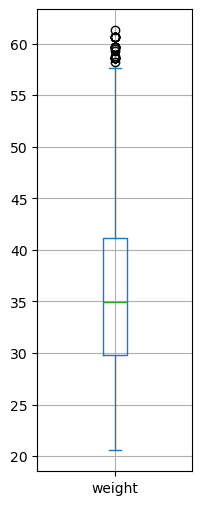

In [ ]:
from matplotlib import pyplot as plt
hw['weight'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Boxplots can be useful to compare samples. For example, the following boxplots compare the distributions of weights between men and women:

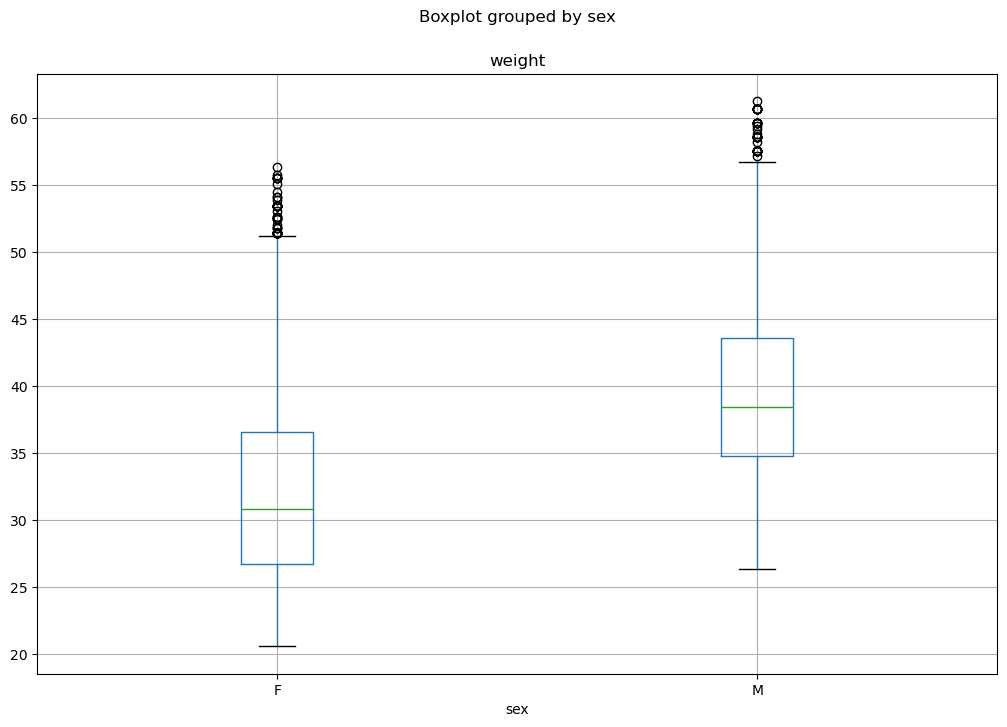

In [ ]:
hw.boxplot(column='weight', by='sex', figsize=(12,8))
plt.show()

From the graph above, we can note that weight has different distributions in males and females, with males overall weighing more, as one would expect.

## References

* Chapter 2 of: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.
* Chapter 3 of: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.